## Lesson 14 - Pandas Group Operations

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# get the python and pandas versions
print('Python version ' + sys.version)
print('Pandas version: ' + pd.__version__)

Python version 3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version: 0.19.0


#### index.name, reset_index, inplace=True

In [3]:
# create dataframe
df = pd.read_csv('survey_scores_2015.csv', index_col=0)
df

,10000,13001,60985,43309,89785,57688,19366,97775,22384,31556,70964,70155,47724,37602
subject_id,,,,,,,,,,,,,,
computer_has,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
computer_os,NaN,Mac,Windows,Mac,Windows,Mac,Mac,Mac,Windows,Mac,Mac,Linux,Mac,Linux
score_bash,0,1,0,3,2,1,0,2,0,1,1,1,0,2
score_command,0,2,1,3,2,1,2,2,0,2,1,1,0,2
score_matlab,0,3,1,0,0,1,3,3,2,3,2,1,1,0
score_perl,0,0,0,0,1,0,0,0,0,0,0,0,0,1
score_python,0,0,2,1,2,0,0,1,0,0,1,1,0,1
score_r,0,0,1,2,2,0,2,0,2,0,2,0,0,2


In [4]:
# remove index
df.index.name = None
df

,10000,13001,60985,43309,89785,57688,19366,97775,22384,31556,70964,70155,47724,37602
computer_has,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
computer_os,NaN,Mac,Windows,Mac,Windows,Mac,Mac,Mac,Windows,Mac,Mac,Linux,Mac,Linux
score_bash,0,1,0,3,2,1,0,2,0,1,1,1,0,2
score_command,0,2,1,3,2,1,2,2,0,2,1,1,0,2
score_matlab,0,3,1,0,0,1,3,3,2,3,2,1,1,0
score_perl,0,0,0,0,1,0,0,0,0,0,0,0,0,1
score_python,0,0,2,1,2,0,0,1,0,0,1,1,0,1
score_r,0,0,1,2,2,0,2,0,2,0,2,0,0,2


In [5]:
# transpose
df = df.transpose()
df

,computer_has,computer_os,score_bash,score_command,score_matlab,score_perl,score_python,score_r
10000,N,NaN,0,0,0,0,0,0
13001,Y,Mac,1,2,3,0,0,0
60985,Y,Windows,0,1,1,0,2,1
43309,Y,Mac,3,3,0,0,1,2
89785,Y,Windows,2,2,0,1,2,2
57688,Y,Mac,1,1,1,0,0,0
19366,Y,Mac,0,2,3,0,0,2
97775,Y,Mac,2,2,3,0,1,0
22384,Y,Windows,0,0,2,0,0,2
31556,Y,Mac,1,2,3,0,0,0


In [6]:
# reset index with inplace=True (also see more advanced function pandas.DataFrame.reindex)
df.reset_index(inplace=True)
df

,index,computer_has,computer_os,score_bash,score_command,score_matlab,score_perl,score_python,score_r
0,10000,N,NaN,0,0,0,0,0,0
1,13001,Y,Mac,1,2,3,0,0,0
2,60985,Y,Windows,0,1,1,0,2,1
3,43309,Y,Mac,3,3,0,0,1,2
4,89785,Y,Windows,2,2,0,1,2,2
5,57688,Y,Mac,1,1,1,0,0,0
6,19366,Y,Mac,0,2,3,0,0,2
7,97775,Y,Mac,2,2,3,0,1,0
8,22384,Y,Windows,0,0,2,0,0,2
9,31556,Y,Mac,1,2,3,0,0,0


In [7]:
# check datatypes
df.dtypes

index            object
computer_has     object
computer_os      object
score_bash       object
score_command    object
score_matlab     object
score_perl       object
score_python     object
score_r          object
dtype: object

In [8]:
# convert score columns to integers
score_cols = ['score_bash', 'score_command', 'score_matlab', 'score_perl', 'score_python', 'score_r']
df[score_cols] = df[score_cols].astype(int)

In [9]:
# check datatypes again
df.dtypes

index            object
computer_has     object
computer_os      object
score_bash        int64
score_command     int64
score_matlab      int64
score_perl        int64
score_python      int64
score_r           int64
dtype: object

#### read_excel, to_excel

In [10]:
df_test = pd.read_excel('test.xlsx', index_col=None)

In [11]:
df_test

,name,age,weight
0,Joe,20,200
1,Bob,33,140
2,Hugh,42,188


In [12]:
df_test['zip'] = [80210, 92103, 46256]
df_test['nan'] = np.nan
df_test['empty'] = ''

In [13]:
df_test

,name,age,weight,zip,nan,empty
0,Joe,20,200,80210,NaN,
1,Bob,33,140,92103,NaN,
2,Hugh,42,188,46256,NaN,


In [14]:
df_test.dtypes

name       object
age         int64
weight      int64
zip         int64
nan       float64
empty      object
dtype: object

In [15]:
df_test.to_excel('test2.xlsx')

#### groupby

Group series using a series of columns or a mapper (dict or key function, apply given function to group, return result as series).

In [16]:
# create group object
comp = df.groupby('computer_os')
comp

In [17]:
# Apply sum function
comp.mean()

,score_bash,score_command,score_matlab,score_perl,score_python,score_r
computer_os,,,,,,
Linux,1.500000,1.500,0.5,0.500000,1.000000,1.000000
Mac,1.125000,1.625,2.0,0.000000,0.375000,0.750000
Windows,0.666667,1.000,1.0,0.333333,1.333333,1.666667


In [18]:
comp_bash = df.groupby(['computer_os','score_bash']).mean()
comp_bash

score_command  score_matlab  score_perl  score_python  \
computer_os score_bash                                                          
Linux       1                     1.0          1.00         0.0          1.00   
            2                     2.0          0.00         1.0          1.00   
Mac         0                     1.0          2.00         0.0          0.00   
            1                     1.5          2.25         0.0          0.25   
            2                     2.0          3.00         0.0          1.00   
            3                     3.0          0.00         0.0          1.00   
Windows     0                     0.5          1.50         0.0          1.00   
            2                     2.0          0.00         1.0          2.00   

                        score_r  
computer_os score_bash           
Linux       1               0.0  
            2               2.0  
Mac         0               1.0  
            1               0.5  
            2               0.0  
            3               2.0  
Windows     0               1.5  
            2               2.0

In [19]:
comp_bash.index

MultiIndex(levels=[['Linux', 'Mac', 'Windows'], [0, 1, 2, 3]],
           labels=[[0, 0, 1, 1, 1, 1, 2, 2], [1, 2, 0, 1, 2, 3, 0, 2]],
           names=['computer_os', 'score_bash'])

You may want to ***not*** have the columns you are grouping by become your index. This can be easily achieved as shown below.

In [20]:
comp_bash2 = df.groupby(['computer_os','score_bash'], as_index=False).mean()
comp_bash2

,computer_os,score_bash,score_command,score_matlab,score_perl,score_python,score_r
0,Linux,1,1.0,1.00,0.0,1.00,0.0
1,Linux,2,2.0,0.00,1.0,1.00,2.0
2,Mac,0,1.0,2.00,0.0,0.00,1.0
3,Mac,1,1.5,2.25,0.0,0.25,0.5
4,Mac,2,2.0,3.00,0.0,1.00,0.0
5,Mac,3,3.0,0.00,0.0,1.00,2.0
6,Windows,0,0.5,1.50,0.0,1.00,1.5
7,Windows,2,2.0,0.00,1.0,2.00,2.0


In [21]:
comp_bash2.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

#### melt

Massage a DataFrame into a format where one or more columns are identifier variables (`id_vars`), while all other
columns, considered measured variables (`value_vars`), are "unpivoted" to the row axis, leaving just two non-identifier columns, 'variable' and 'value'.

In [22]:
df

,index,computer_has,computer_os,score_bash,score_command,score_matlab,score_perl,score_python,score_r
0,10000,N,NaN,0,0,0,0,0,0
1,13001,Y,Mac,1,2,3,0,0,0
2,60985,Y,Windows,0,1,1,0,2,1
3,43309,Y,Mac,3,3,0,0,1,2
4,89785,Y,Windows,2,2,0,1,2,2
5,57688,Y,Mac,1,1,1,0,0,0
6,19366,Y,Mac,0,2,3,0,0,2
7,97775,Y,Mac,2,2,3,0,1,0
8,22384,Y,Windows,0,0,2,0,0,2
9,31556,Y,Mac,1,2,3,0,0,0


In [23]:
df_melted = pd.melt(df, id_vars=['computer_has', 'computer_os'], value_vars=score_cols)
df_melted

,computer_has,computer_os,variable,value
0,N,NaN,score_bash,0
1,Y,Mac,score_bash,1
2,Y,Windows,score_bash,0
3,Y,Mac,score_bash,3
4,Y,Windows,score_bash,2
5,Y,Mac,score_bash,1
6,Y,Mac,score_bash,0
7,Y,Mac,score_bash,2
8,Y,Windows,score_bash,0
9,Y,Mac,score_bash,1


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

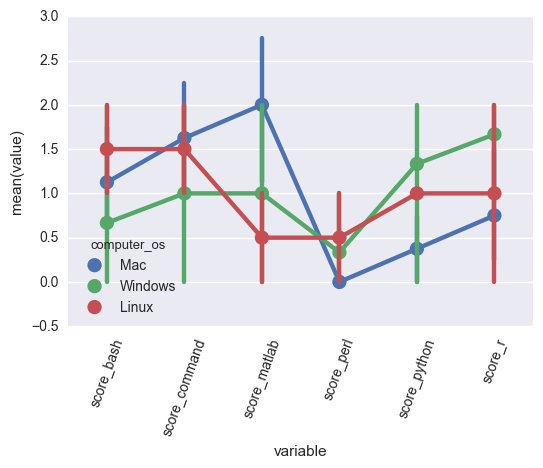

In [24]:
sns.pointplot(x='variable', y='value', hue='computer_os', data=df_melted)
plt.xticks(rotation=70)

#### pivot

Produce 'pivot' table based on 3 columns of this DataFrame.

* index : ndarray -
    Labels to use to make new frame's index
* columns : ndarray -
    Labels to use to make new frame's columns
* values : ndarray -
    Values to use for populating new frame's values

In [25]:
# create a dataframe that's "stacked"a
import pandas.util.testing as tm; tm.N = 3
def unpivot(frame):
    N, K = frame.shape
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    return pd.DataFrame(data, columns=['date', 'variable', 'value'])
df2 = unpivot(tm.makeTimeDataFrame())
df2

,date,variable,value
0,2000-01-03,A,0.066300
1,2000-01-04,A,-0.766183
2,2000-01-05,A,-2.729239
3,2000-01-03,B,0.443100
4,2000-01-04,B,-0.788803
5,2000-01-05,B,1.350740
6,2000-01-03,C,0.724169
7,2000-01-04,C,2.401544
8,2000-01-05,C,-0.753662
9,2000-01-03,D,-0.446412


If we wanted all the data for variable A, we could do this:

In [26]:
df2[df2['variable'] == 'A']

,date,variable,value
0,2000-01-03,A,0.066300
1,2000-01-04,A,-0.766183
2,2000-01-05,A,-2.729239


But suppose we wish to do time series operations with the variables. A better representation would be where the columns are the unique variables and an index of dates identifies individual observations. 

In [27]:
# to reshape the data into this form, use the pivot function
df2_pivot = df2.pivot(index='date', columns='variable', values='value')
df2_pivot

variable,A,B,C,D
date,,,,
2000-01-03,0.066300,0.443100,0.724169,-0.446412
2000-01-04,-0.766183,-0.788803,2.401544,1.770596
2000-01-05,-2.729239,1.350740,-0.753662,1.451567


(array([ 730122.,  730123.,  730124.]), <a list of 3 Text xticklabel objects>)

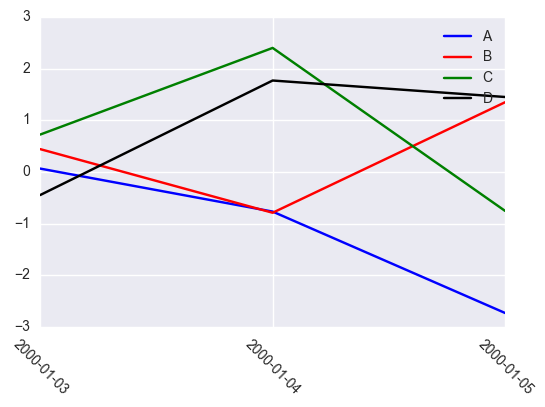

In [28]:
plt.plot(df2_pivot.index, df2_pivot.A, 'b', 
         df2_pivot.index, df2_pivot.B, 'r',
         df2_pivot.index, df2_pivot.C, 'g', 
         df2_pivot.index, df2_pivot.D, 'k')
plt.legend(df2_pivot.columns)
xlabels = [x.strftime('%Y-%m-%d') for x in df2_pivot.index]
plt.xticks(xlabels, xlabels)
plt.xticks(rotation=-45)